start epoch 1
5000 [0.8693648661130835, 0.8980655002160274]
10000 [0.22830931462892162, 0.4916755879866775]
15000 [0.1711580569203385, 0.4149482529957522]
20000 [0.15447708062568505, 0.3817997538598795]
25000 [0.1520964981233519, 0.36811333673769614]
30000 [0.12782550461462702, 0.3367246522161315]
35000 [0.1301690630318285, 0.2986916638474757]
40000 [0.09043855210977954, 0.2852086218124529]
45000 [0.11145974894057117, 0.3359775500837247]
50000 [0.10215315920362564, 0.29574645372869623]
55000 [0.09631177572685273, 0.28265825477564077]
60000 [0.08217423698675516, 0.26059391457473413]
9837 / 10000, 98.37%, 121.8190815448761
9161 / 10000, 91.61%, 67.27736973762512


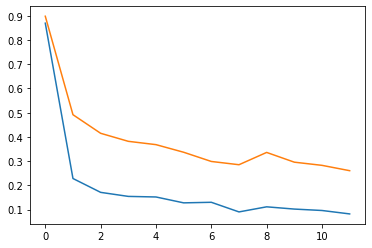

In [46]:
%matplotlib inline

import torch
import torchvision
import torchvision.transforms as transforms
import os.path
import time

transform = transforms.Compose(
    [
     transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,)),
     ])

root = 'data'
trainset = torchvision.datasets.MNIST(root=root, train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root=root, train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset,
                                         shuffle=False, num_workers=2)

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


class Net1(nn.Module):
    def __init__(self):
        super(Net1, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 100)

    def forward(self, x):
        # print('input', x.shape)
        x = self.conv1(x)
        # print('conv', x.shape)
        x = F.relu(x)
        # print('relu', x.shape)
        x = self.pool(x)
        # print('pool', x.shape)

        x = self.conv2(x)
        # print('conv', x.shape)
        x = F.relu(x)
        # print('relu', x.shape)
        x = self.pool(x)
        # print('pool', x.shape)

        x = x.view(-1, 16 * 4 * 4)
        # print('view', x.shape)

        x = self.fc1(x)
        # print('Linear', x.shape)
        x = F.relu(x)
        # print('relu', x.shape)

        x = self.fc2(x)
        # print('Linear', x.shape)
        x = F.relu(x)
        # print('relu', x.shape)

        x = self.fc3(x)
        # print('Linear', x.shape)
        return x
    
class Net2(nn.Module):
    def __init__(self):
        super(Net2, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 100)
    def forward(self, x):
        
        x = x.view(-1, 28 * 28)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        return x

class Net3(nn.Module):
    def __init__(self):
        super(Net3, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 84)
        self.fc2 = nn.Linear(84, 100)
    def forward(self, x):
        
        x = x.view(-1, 28 * 28)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return x

class Net4(nn.Module):
    def __init__(self):
        super(Net4, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 100)
    def forward(self, x):
        
        x = x.view(-1, 28 * 28)
        x = self.fc1(x)
        x = F.relu(x)
        return x
    
class Net5(nn.Module):
    def __init__(self):
        super(Net5, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 100)
    def forward(self, x):
        
        x = x.view(-1, 28 * 28)
        x = self.fc1(x)
        return x
    
class Train:
    def __init__(self, nets):
        self.nets = nets
        self.optimizers = [optim.SGD(net.parameters(), lr=0.001, momentum=0.9) for net in self.nets]
        self.times = [0]*len(self.nets)
        self.running_losss = [.0]*len(self.nets)
    def start_train(self):
        self.reset_loss()
        for net in self.nets:
            net.train()
        self.times = [0]*len(self.nets)
        

    def reset_loss(self):
        self.running_losss = [.0] * len(self.nets)

    def train(self, inputs, labels):
        for i in range(len(self.nets)):
            t = time.time()
            net, optimizer = self.nets[i], self.optimizers[i],
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            self.running_losss[i] += loss.item()
            self.times[i] += time.time() - t

    def start_test(self):
        self.corrects = [0] * len(self.nets)
        self.totals = [0] * len(self.nets)
        for net in self.nets:
            net.eval()

    def test(self, inputs, labels):
        for i in range(len(self.nets)):
            net = self.nets[i]
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            self.totals[i] += labels.size(0)
            self.corrects[i] += (predicted == labels).sum().item()

import matplotlib.pyplot as plt


criterion = nn.CrossEntropyLoss()

train = Train([Net1(), Net2()])


for epoch in range(1):  # loop over the dataset multiple times
    nets_loss = []
    train.start_train()
    print('start epoch', epoch+1)
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        # zero the parameter gradients
        train.train(inputs, labels)
        
        if i % 5000 == 4999:    # print every 2000 mini-batches
            losses = [v/5000 for v in train.running_losss]
            nets_loss.append(losses)
            print(i + 1, losses)
            train.reset_loss()

    train.start_test()
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            train.test(images, labels)

    for correct, total, time in zip(train.corrects, train.totals, train.times):
        print(f'{correct} / {total}, {100 * correct / total}%, {time}')
        
    
    t = torch.tensor(nets_loss).T
    for i in t:
        plt.plot(i)
    plt.show()
    
    print()


学习一下如何现实多维数组

tensor([[0.8140, 0.5605, 0.4589, 0.4055, 0.3777, 0.3627, 0.3535, 0.3501, 0.3040,
         0.3022, 0.3076, 0.2886],
        [2.9431, 2.7832, 2.8325, 2.6654, 2.7315, 2.7743, 2.7889, 2.8170, 2.8455,
         2.7154, 2.7225, 2.7398],
        [0.9903, 0.9116, 0.8256, 0.7645, 0.8193, 0.8298, 0.7454, 0.8338, 0.7950,
         0.7771, 0.7854, 0.7623]])


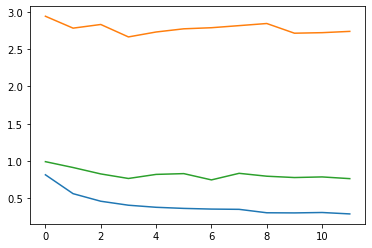

In [42]:
a = torch.tensor([[0.8139921264928094, 2.9430634845225154, 0.9903136591996965],
                  [0.560482340416212, 2.783225620962697, 0.9116284510826609],
                  [0.4589177074134597, 2.8324553494484355, 0.825627414360773],
                  [0.4054722719208605, 2.665389496105636, 0.7644844574027896],
                  [0.37765899339529824, 2.7314628625315485, 0.8192943389672124],
                  [0.362716557039878, 2.7742862829991317, 0.8297525283920233],
                  [0.3535427235240886, 2.788945757508181, 0.7454414908425123],
                  [0.35009929939903245, 2.817012068291202, 0.8337979985233839],
                  [0.3040277285471033, 2.845472845188704, 0.794963373902912],
                  [0.30217981782797043, 2.715351161352452, 0.7770873367965873],
                  [0.3076349995820063, 2.7225185061255908, 0.7854107405400742],
                  [0.28863684982049326, 2.7397970165469676, 0.7623432738447614]
                 ])
print(a.T)
slots = a.T.numpy()
slots = slots.tolist()
for t in a.T:
    plt.plot(t)
plt.show()